In [1]:
! ls

 clean_tweet.csv			    preprop
 clean_tweet_subc_withuser.csv		    term_freq_df.csv
 clean_tweet_subc_withuser_f.csv	    train_clean.csv
'data_vis(1).ipynb'			    Untitled.ipynb
'feature_normal_tfidf_algo_comp(2).ipynb'


In [2]:


import pandas as pd
df = pd.read_csv('clean_tweet_subc_withuser.csv')
df.head()



,id,text,subc
0,90194,user user go home you re drunk user,0
1,97670,user liberals are all kookoo,1
2,52415,user was literally just talking about this lol...,2
3,13384,user canada doesn need another cuck we already...,0
4,28414,user you are lying corrupt traitor nobody want...,0


In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
df.head()

,id,text,subc
0,90194,user user go home you re drunk user,0
1,97670,user liberals are all kookoo,1
2,52415,user was literally just talking about this lol...,2
3,13384,user canada doesn need another cuck we already...,0
4,28414,user you are lying corrupt traitor nobody want...,0


In [5]:
'''0 : IND , 1 : OTH , 2 : GRP'''

'0 : IND , 1 : OTH , 2 : GRP'

In [6]:
df = df[pd.notnull(df['text'])]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 0 to 3875
Data columns (total 3 columns):
id      3876 non-null int64
text    3876 non-null object
subc    3876 non-null int64
dtypes: int64(2), object(1)
memory usage: 121.1+ KB


In [9]:
x = df.text
y = df.subc

In [10]:
from sklearn.model_selection import train_test_split
SEED = 50
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.10, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.20, random_state=SEED)

In [11]:



print ("Train set has total {0} entries with {1:.2f}% IND, {2:.2f}% OTH, {3:.2f}% GRP".format(
                                                                                                len(x_train),
                                                                             (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
    
                                                                            (len(x_train[y_train == 1]) / (len(x_train)*1.))*100,
       
                                                                            (len(x_train[y_train == 2]) / (len(x_train)*1.))*100))

print ("Validation set has total {0} entries with {1:.2f}% IND, {2:.2f}% OTH, {3:.2f}% GRP".format(len(x_validation),
                                                                             (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
                                                                            (len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 2]) / (len(x_validation)*1.))*100))

print ("Test set has total {0} entries with {1:.2f}% IND, {2:.2f}% OTH, {3:.2f}% GRP".format(len(x_test),
                                                                             (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == 1]) / (len(x_test)*1.))*100,(len(x_test[y_test == 2]) / (len(x_test)*1.))*100))


Train set has total 3488 entries with 62.64% IND, 10.12% OTH, 27.24% GRP
Validation set has total 310 entries with 55.16% IND, 10.97% OTH, 33.87% GRP
Test set has total 78 entries with 65.38% IND, 10.26% OTH, 24.36% GRP


In [13]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
%%time
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

CPU times: user 251 ms, sys: 3.47 ms, total: 254 ms
Wall time: 659 ms


In [15]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])
print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_validation, tbpred))

Accuracy Score: 28.71%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                  21                  13
negative                 103                  68
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.50      0.40      0.44       171
           1       0.12      0.62      0.20        34
           2       0.00      0.00      0.00       105

   micro avg       0.29      0.29      0.29       310
   macro avg       0.21      0.34      0.22       310
weighted avg       0.29      0.29      0.27       310



/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time


In [17]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [18]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [19]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.38s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.17s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.19s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.17s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 66.45%

In [20]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 65.16%
model is 10.00% more accurate than null accuracy
train and test time: 0.27s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 65.16%
model is 10.00% more accurate than null accuracy
train and test time: 0.26s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 65.16%
model is 10.00% more accurate than null accuracy
train and test time: 0.25s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 65.16%
model is 10.00% more accurate than null accuracy
train and test time: 0.30s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 65.16%

In [21]:
csv = 'term_freq_df.csv'
term_freq_df = pd.read_csv(csv,index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]


,negative,positive,total
user,4590,829,5419
the,1556,364,1920
is,1517,187,1704
to,1188,203,1391
you,1208,149,1357
and,957,184,1141
he,880,55,935
of,657,160,817
are,614,110,724
that,601,115,716


In [22]:
from sklearn.feature_extraction import text

a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

False

In [23]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [24]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)


RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.20s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.20s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.19s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.18s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 62.90%
mod

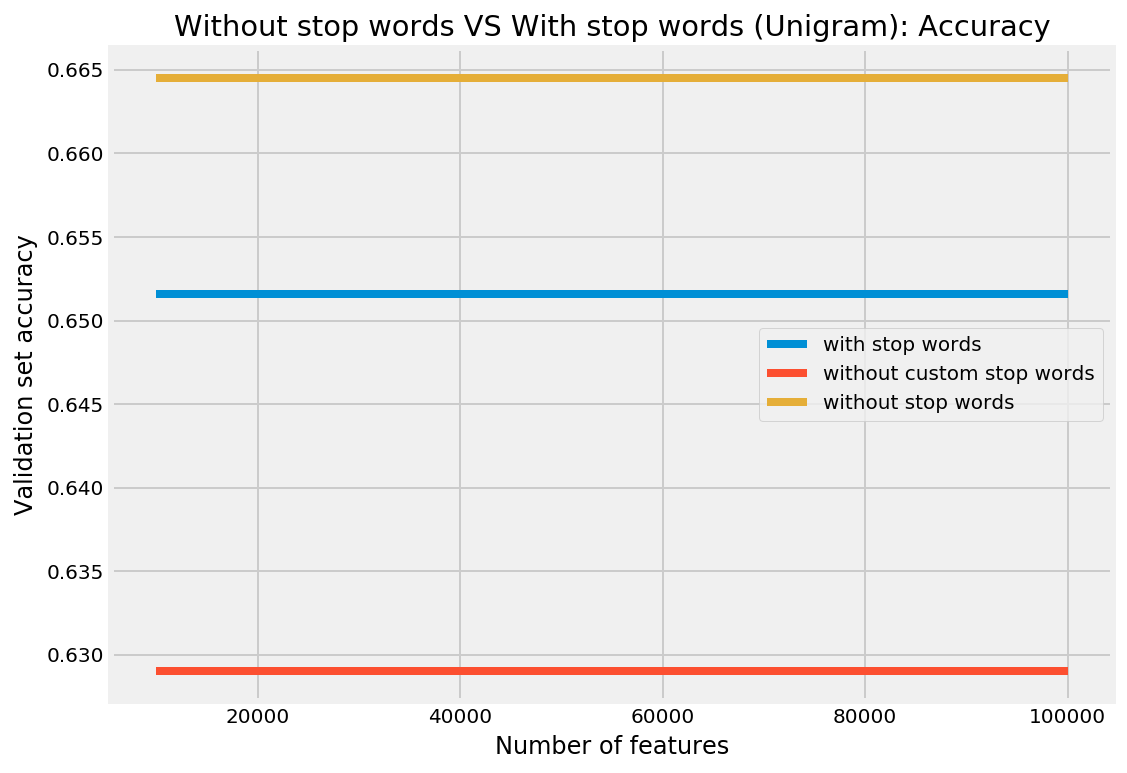

In [25]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [26]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2),stop_words='english')

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 66.13%
model is 10.97% more accurate than null accuracy
train and test time: 0.34s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.37s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.44s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 65.48%
model is 10.32% more accurate than null accuracy
train and test time: 0.43s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 65.48%

In [27]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3),stop_words='english')


RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 66.77%
model is 11.61% more accurate than null accuracy
train and test time: 0.43s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 67.10%
model is 11.94% more accurate than null accuracy
train and test time: 0.47s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 66.13%
model is 10.97% more accurate than null accuracy
train and test time: 0.65s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 66.45%
model is 11.29% more accurate than null accuracy
train and test time: 0.65s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 66.13%

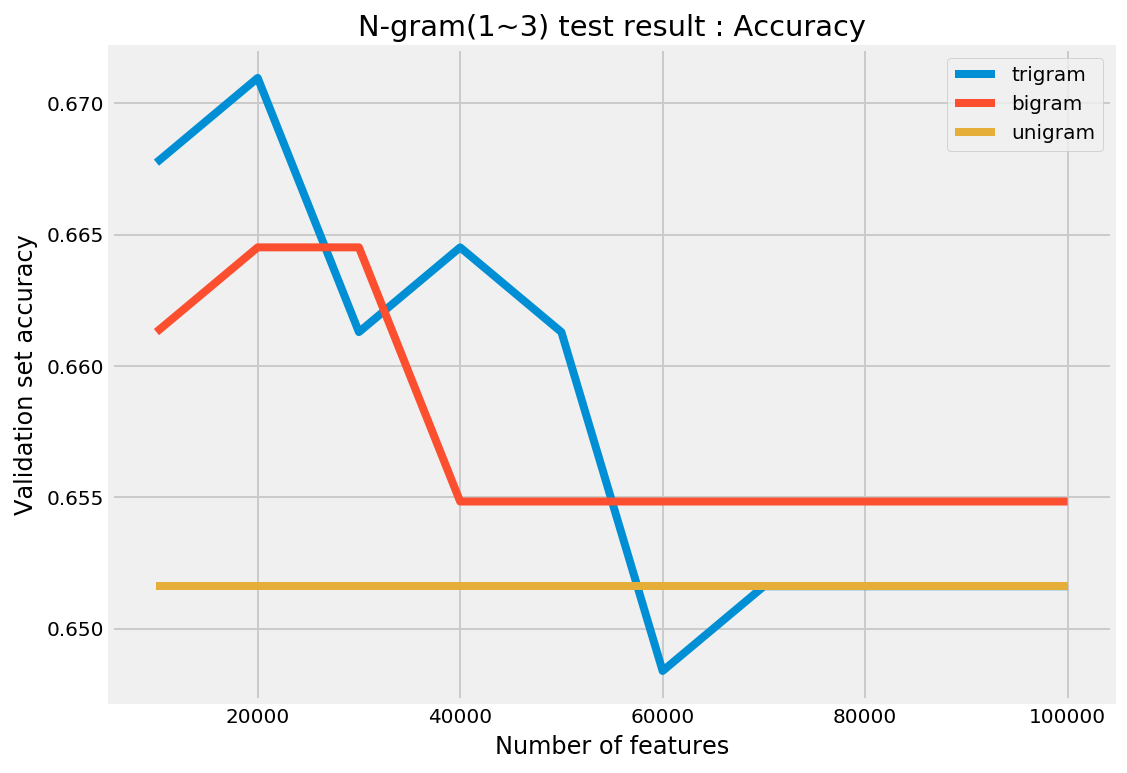

In [28]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [29]:
'''trigram-20k'''

'trigram-20k'

In [30]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive']))


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [33]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec,stop_words='english')


RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 63.23%
model is 8.06% more accurate than null accuracy
train and test time: 0.21s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 63.23%
model is 8.06% more accurate than null accuracy
train and test time: 0.11s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 63.23%
model is 8.06% more accurate than null accuracy
train and test time: 0.12s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 63.23%
model is 8.06% more accurate than null accuracy
train and test time: 0.11s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 63.23%
mod

In [34]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2),stop_words='english')

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.25s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 63.87%
model is 8.71% more accurate than null accuracy
train and test time: 0.26s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 63.23%
model is 8.06% more accurate than null accuracy
train and test time: 0.26s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 62.58%
model is 7.42% more accurate than null accuracy
train and test time: 0.29s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 62.58%
mod

In [35]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3),stop_words='english')


RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 10000 features


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 64.52%
model is 9.35% more accurate than null accuracy
train and test time: 0.38s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 55.16%
accuracy score: 64.19%
model is 9.03% more accurate than null accuracy
train and test time: 0.37s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 55.16%
accuracy score: 63.87%
model is 8.71% more accurate than null accuracy
train and test time: 0.45s
--------------------------------------------------------------------------------
Validation result for 40000 features
null accuracy: 55.16%
accuracy score: 63.87%
model is 8.71% more accurate than null accuracy
train and test time: 0.44s
--------------------------------------------------------------------------------
Validation result for 50000 features
null accuracy: 55.16%
accuracy score: 62.90%
mod

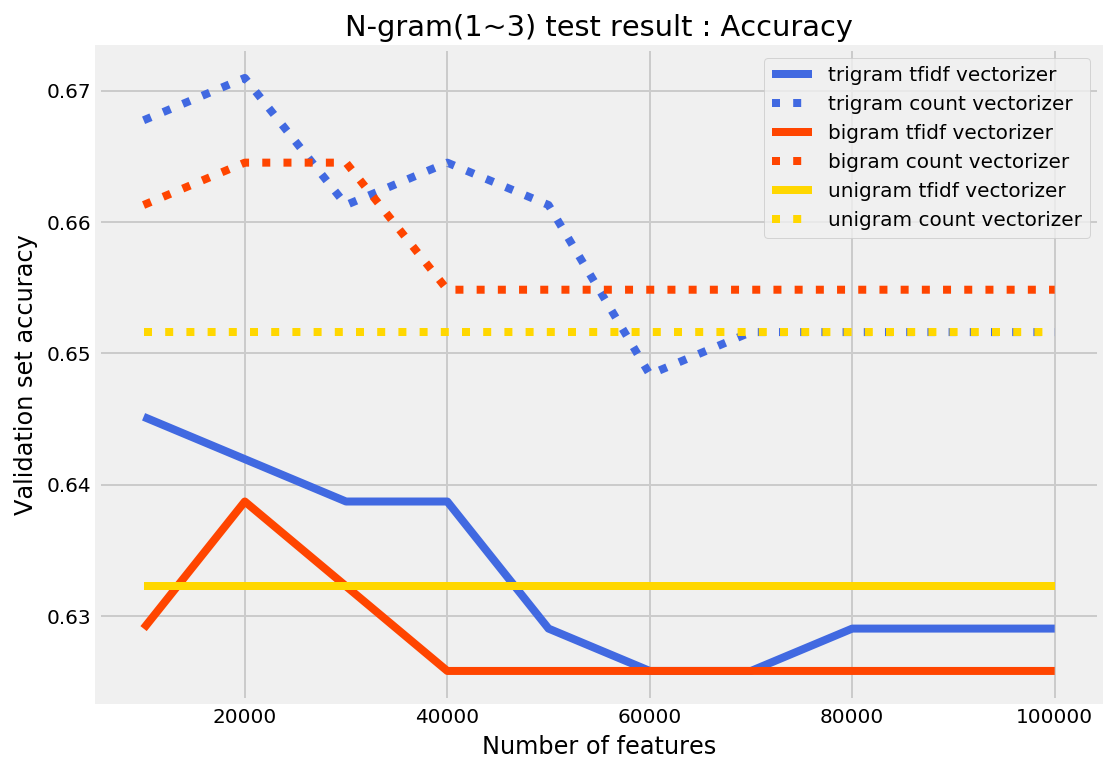

In [36]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [38]:
cvec = CountVectorizer()
def classifier_comparator(vectorizer=cvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result


In [39]:
%%time
trigram_result = classifier_comparator(n_features=20000,ngram_range=(1,3),stop_words='english')

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 67.10%
model is 11.94% more accurate than null accuracy
train and test time: 0.49s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 55.16%
accuracy score: 64.19%
model is 9.03% more accurate than null accuracy
train and test time: 1.11s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        max_features=None, n...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])
null accuracy: 55.16%
accuracy score: 65.16%
model is 10.00% more accurate than null accuracy
train and test time: 1.76s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null 

/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 55.16%
accuracy score: 61.61%
model is 6.45% more accurate than null accuracy
train and test time: 0.34s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.32s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 55.16%
accuracy score: 53.87%
model is 1.29% less accurate than null accuracy
train and test time: 0.31s
--------------------------------------------------------------------------------
CPU times: user 7.41 s, sys: 39.4 ms, total: 7.45 s
Wall time: 7.91 s


In [40]:
'''lr-67.10-cvec-20k-trig'''

'lr-67.10-cvec-20k-trig'

In [41]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()
clf6 = AdaBoostClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5), ('ada', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6,eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'AdaBoostClassifier','Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', CountVectorizer(max_features=20000,ngram_range=(1, 3),stop_words='english')),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


null accuracy: 55.16%
accuracy score: 67.10%
model is 11.94% more accurate than null accuracy
train and test time: 0.49s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 55.16%
accuracy score: 63.87%
model is 8.71% more accurate than null accuracy
train and test time: 1.25s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 55.16%
accuracy score: 62.90%
model is 7.74% more accurate than null accuracy
train and test time: 0.33s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
null accuracy: 55.16%
accuracy score: 66.13%
model is 10.97% more accurate than null accuracy
train and test time: 2.06s
--------------------------------------------------------------------------------
Validation result for Passive Aggresive Classifier
PassiveAggressiveClassifier(C=1.0, ave

/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 55.16%
accuracy score: 64.19%
model is 9.03% more accurate than null accuracy
train and test time: 0.33s
--------------------------------------------------------------------------------
Validation result for AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
null accuracy: 55.16%
accuracy score: 60.00%
model is 4.84% more accurate than null accuracy
train and test time: 0.70s
--------------------------------------------------------------------------------
Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('svc', LinearS...=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0,

/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


null accuracy: 55.16%
accuracy score: 65.48%
model is 10.32% more accurate than null accuracy
train and test time: 3.09s
--------------------------------------------------------------------------------


/home/mainak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
